# 연속형 시각화

- 파이차트: 범주의 수가 많아지면 막대 그래프 이용할 것
- 히스토그램: 관측된 연속형 데이터 값들의 분포 파악 가능. 메모리 문제 발생 가능, 경계가 연속적이지 않음
- 커널밀도추정: 변수가 가질 수 있는 모든 값의 확률(밀도)을 추정하는 것 (히스토그램의 한계를 극복)
- 박스플롯: 다양한 정보(개략적인 흩어짐 형태)를 손쉽게 표현. (중앙값, 1분위수, 3분위수, 최댓값, 최솟값 표현)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing = pd.read_excel('./boston_housing.xls')
housing_data = housing.copy()

In [4]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [6]:
# AGE_G5 컬럼을 만들어 나이별 세대 수를 5개로 구분한 값을 넣어줌
bins = [0, 20, 40, 60, 80, 100]
names = ["G1", "G2", "G3", "G4", "G5"]
housing_data['AGE_G5'] = pd.cut(housing_data['AGE'], bins, labels=names)
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,AGE_G5
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,G4
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,G4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,G4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,G3
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,G3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,G4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,G4
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,G5
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,G5


In [9]:
# 각 세대별 분포 파악
pie_df_G5 = pd.DataFrame(housing_data['AGE_G5'].value_counts())
pie_df_G5

,AGE_G5
G5,240
G4,81
G3,76
G2,75
G1,34


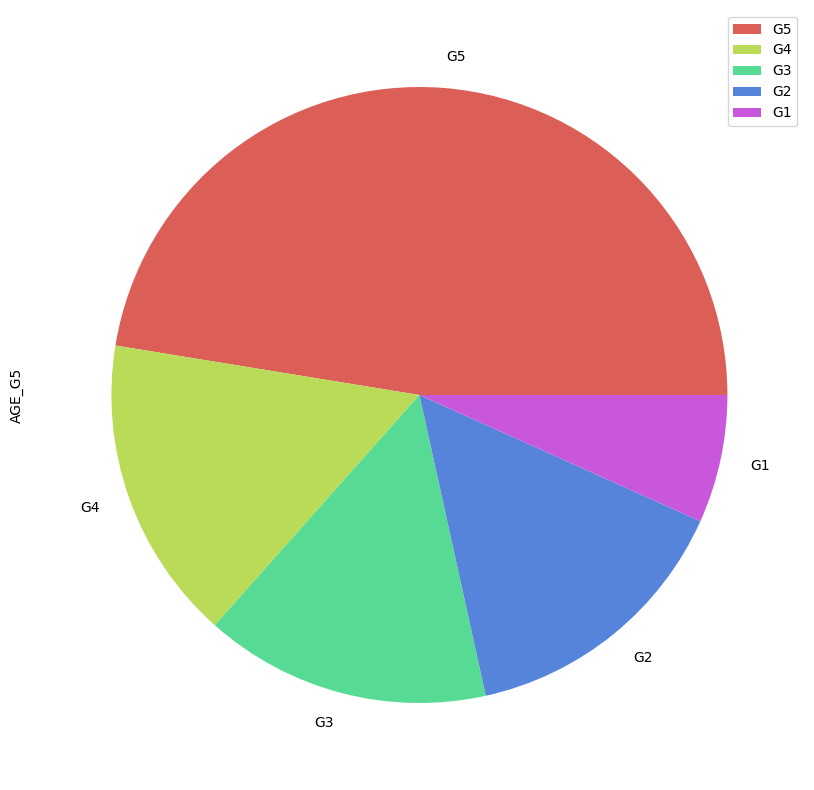

In [15]:
pie_df_G5.plot.pie(y='AGE_G5', figsize=(10, 10), colors = sns.color_palette('hls', len(pie_df_G5)))
plt.show()

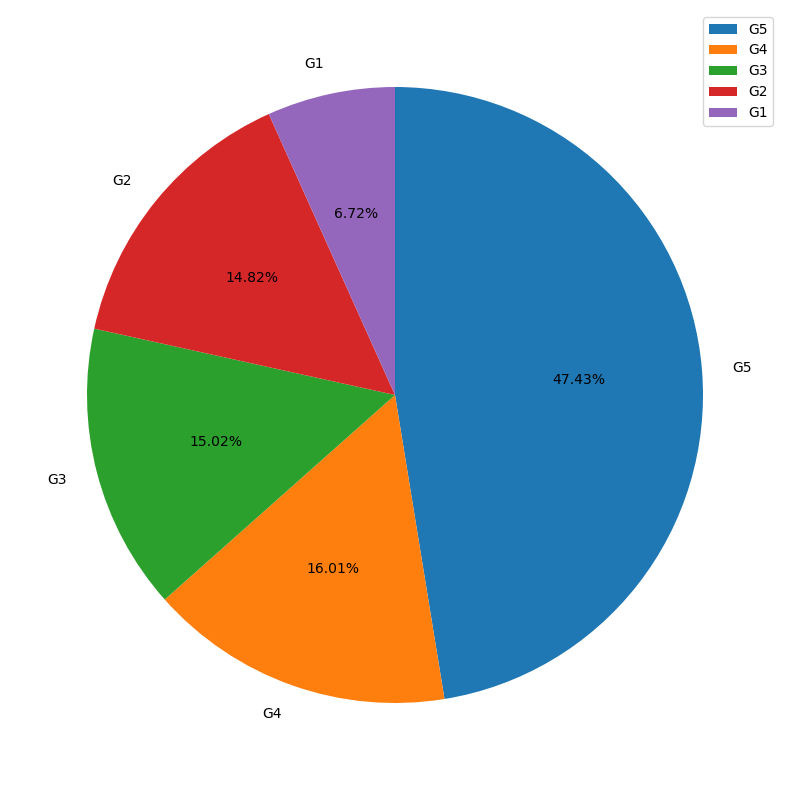

In [18]:
plt.figure(figsize=(10,10)) # 캔버스 생성
plt.pie(pie_df_G5['AGE_G5'], # 차트 출력
        labels=pie_df_G5.index, # label 출력
        startangle=90, # 시작점을 90도로 지정
        counterclock=False, # 시계 방향
        autopct='%.2f%%' # 퍼센트 출력
        )

plt.legend() # 범례 출력
plt.show()

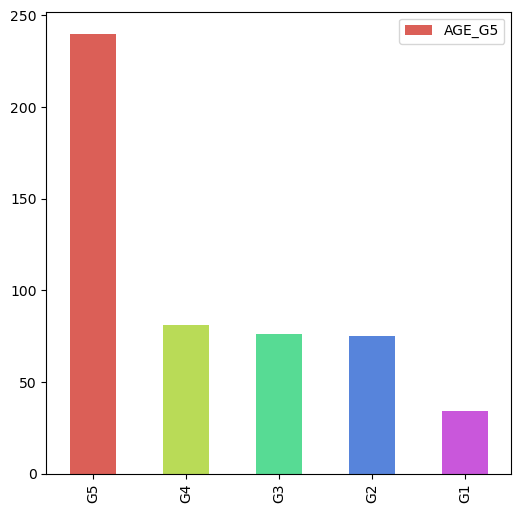

In [23]:
pie_df_G5.plot.bar(y='AGE_G5', figsize=(6, 6), color = sns.color_palette('hls', len(pie_df_G5)))
plt.show()

# 파이그래프와 다르게 매개변수가 colors가 아니라 color 임

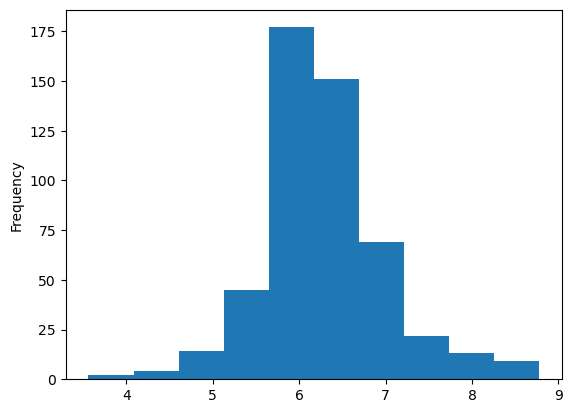

In [24]:
housing_data['RM'].plot.hist()
plt.show()

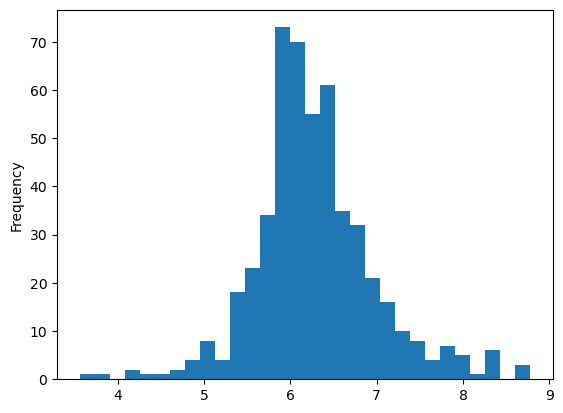

In [26]:
housing_data['RM'].plot.hist(bins=30)
plt.show()

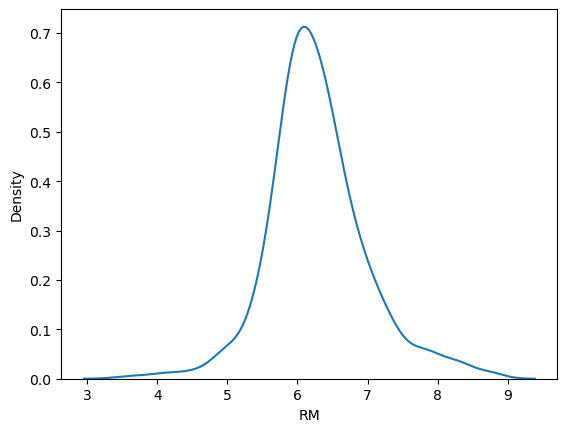

In [28]:
sns.kdeplot(housing_data['RM'])
plt.show()

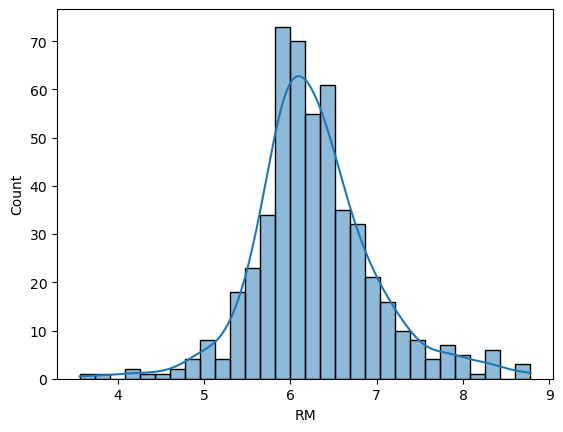

In [30]:
sns.histplot(housing_data['RM'], bins = 30, kde = True)
plt.show()

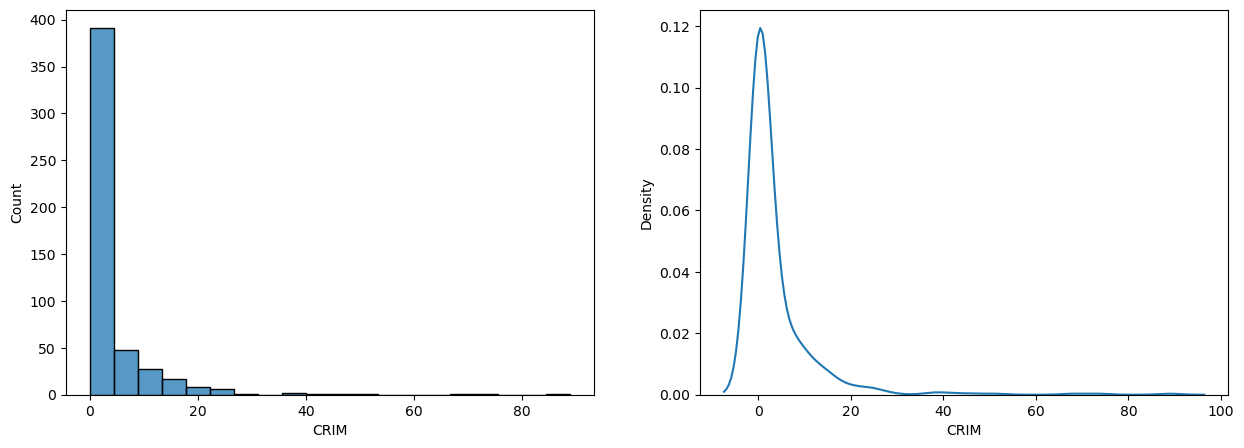

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5)) # ax 는 출력할 곳을 정해주는 값

sns.histplot(housing_data['CRIM'], bins = 20, ax=ax[0])
sns.kdeplot(housing_data['CRIM'], ax=ax[1])

plt.show()

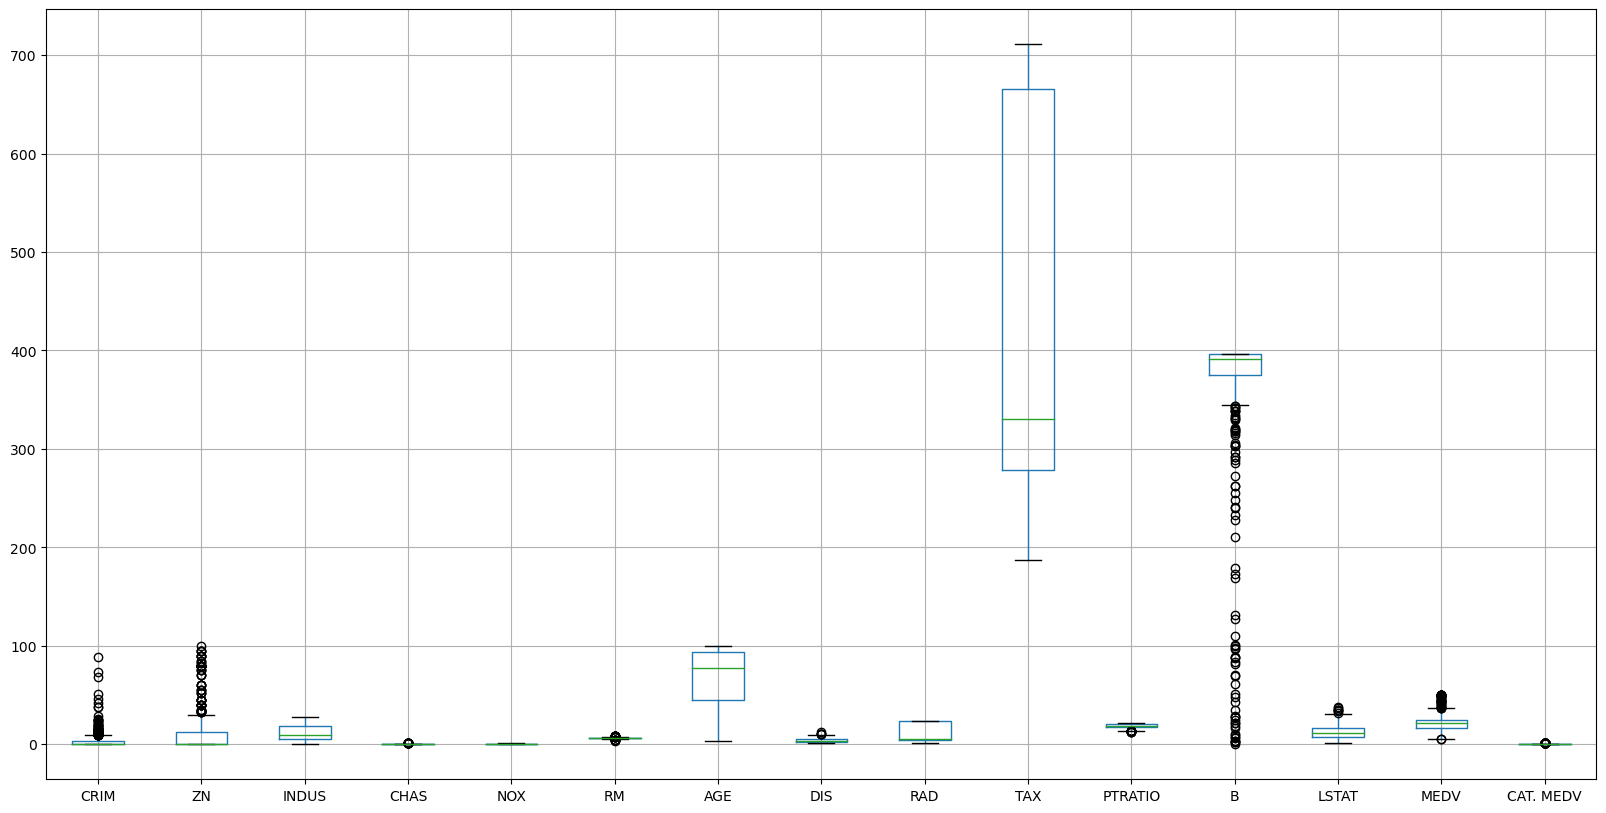

In [34]:
housing_data.boxplot(figsize=(20,10))
plt.show()

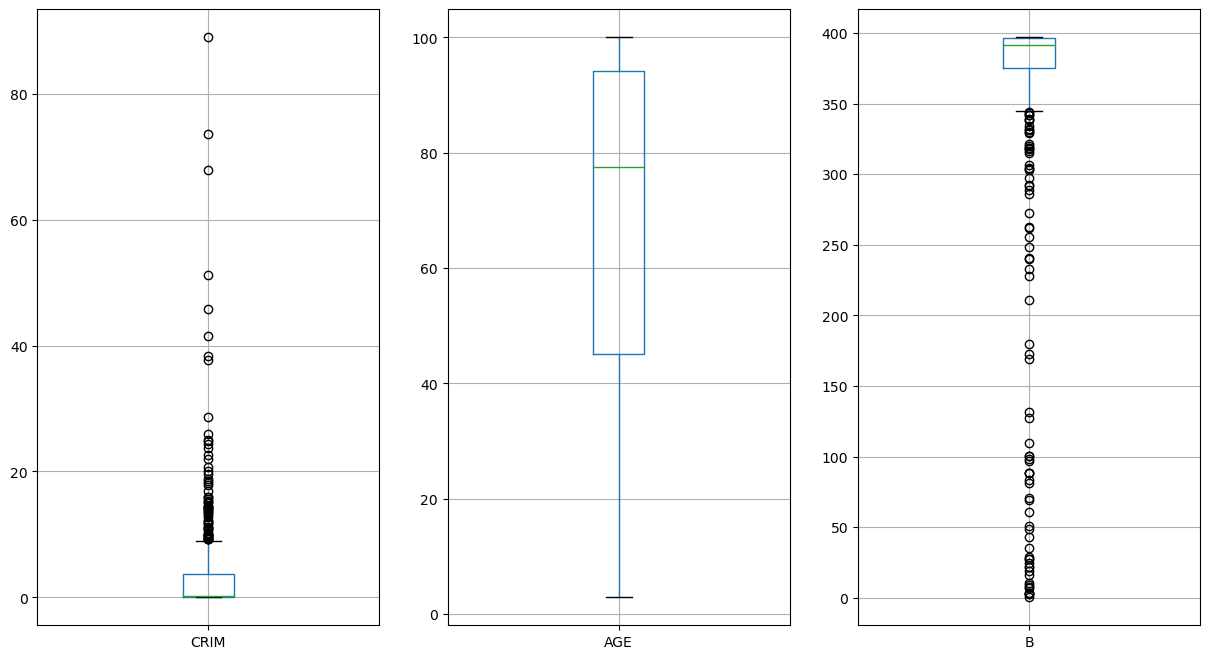

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


In [35]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 8))

housing_data[['CRIM']].boxplot(ax=ax[0])
housing_data[['AGE']].boxplot(ax=ax[1])
housing_data[['B']].boxplot(ax=ax[2])

plt.show()

print(housing_data['AGE'].describe())

In [36]:
q1 = housing_data['AGE'].quantile(0.25)
q3 = housing_data['AGE'].quantile(0.75)
iqr = q3 - q1
print('minimum: ', q1 - 1.5 * iqr)
print('maximum: ', q3 + 1.5 * iqr)

minimum:  -28.54999999999999
maximum:  167.64999999999998
